# Captura de dataset
En este script que desarrollé, utilicé OpenCV para procesar un video específico. Automáticamente leo el video desde una ruta predefinida, capturo cada fotograma, lo redimensiono a 30x30 píxeles y lo guardo en un directorio específico. Utilicé un contador para numerar cada archivo de salida y evitar sobrescribir imágenes previamente almacenadas. El proceso de captura continúa hasta que se presiona la tecla 'Esc' o hasta que el video llega a su fin, facilitando la creación de conjuntos de datos para análisis posteriores.

In [ ]:
import numpy as np 
import cv2 as cv
import os

cap = cv.VideoCapture("C:\\Users\\Janin\\Documents\\IA\\Videos\\tornado5.mp4") 

output_folder = 'C:\\Users\\Janin\\Documents\\IA\\datasetTrag\\tornado\\'
files = os.listdir(output_folder)
if files:
    i = max([int(f.split('tornado')[1].split('.jpg')[0]) for f in files if 'tornado5' in f]) + 1
else:
    i = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break  # Si no se puede leer el fotograma, sal del bucle
    
    cv.imshow('img', frame)
    k = cv.waitKey(1)
    
    # Redimensionar la imagen capturada a 30x30 píxeles
    frame_resized = cv.resize(frame, (30, 30), interpolation=cv.INTER_AREA)
    
    cv.imwrite(output_folder + 'tornado' + str(i) + '.jpg', frame_resized)
    i += 1
    
    if k == 27:
        break

cap.release()
cv.destroyAllWindows()


import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


importo diversas herramientas y capas de las bibliotecas Keras y TensorFlow para construir modelos de aprendizaje profundo. Utilizo Sequential y Model para definir arquitecturas de redes, junto con capas como Dense, Dropout, Flatten, BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, y LeakyReLU para estructurar el modelo. También utilizo to_categorical para convertir etiquetas en forma categórica y Conv2D para agregar capas convolucionales que son esenciales en modelos que procesan imágenes.

In [30]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU


# Proceso de lectura y análisis de imágenes
se leen imágenes de diferentes formatos desde un directorio específico en mi sistema. Utilicé la librería os para navegar por los directorios y matplotlib.pyplot para leer las imágenes. Implementé expresiones regulares para filtrar archivos por extensión, asegurándome de incluir solo imágenes con tres canales de color. Durante el proceso, llevé un registro del número de imágenes en cada subdirectorio y mostré actualizaciones en tiempo real sobre la cantidad de imágenes procesadas. Esto me permitió verificar y validar la efectividad del script en tiempo real.

In [31]:
import os
import numpy as np
import matplotlib.pyplot as plt
import re  # Importar el módulo de expresiones regulares

dirname = os.path.join(os.getcwd(),'C:\\Users\\Janin\\Documents\\IA\\datasetDesastres\\')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:\Users\Janin\Documents\IA\datasetDesastres\\
C:\Users\Janin\Documents\IA\datasetDesastres\\asaltos 1
C:\Users\Janin\Documents\IA\datasetDesastres\\incendios 39116
C:\Users\Janin\Documents\IA\datasetDesastres\\inundaciones 12689
C:\Users\Janin\Documents\IA\datasetDesastres\\RoboCasaHabitacion 19639
C:\Users\Janin\Documents\IA\datasetDesastres\\tornados 23677
Directorios leidos: 5
Imagenes en cada directorio [39117, 12689, 19639, 23677, 33074]
suma Total de imagenes en subdirs: 128196


# Generación de etiquetas para imágenes

fragmento de código para asignar etiquetas a un conjunto de imágenes que había agrupado previamente por directorio. Cada conjunto de imágenes en un directorio específico recibió una etiqueta única, que se incrementó secuencialmente para cada nuevo directorio. Este proceso garantizó que cada imagen quedara correctamente etiquetada de acuerdo con su grupo, lo cual es esencial para tareas de clasificación en proyectos de aprendizaje automático. Al final, verifiqué la cantidad de etiquetas creadas para asegurar que todas las imágenes fueron etiquetadas correctamente.

In [32]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  128196


In [33]:
tragedias = []
indice = 0
for directorio in directories:
    # Extrae el nombre del directorio final del path
    name = directorio.split(os.sep)[-1]
    print(indice, name)
    tragedias.append(name) 
    indice += 1


0 asaltos
1 incendios
2 inundaciones
3 RoboCasaHabitacion
4 tornados


In [34]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy



# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


# Creamos sets de entrenamiento y test

In [35]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (102556, 30, 30, 3) (102556,)
Testing data shape :  (25640, 30, 30, 3) (25640,)


Text(0.5, 1.0, 'Ground Truth : 4')

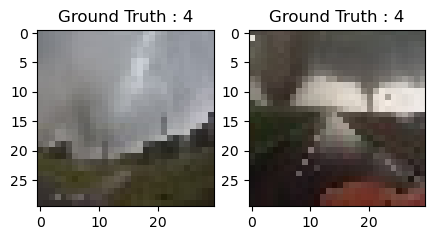

In [36]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

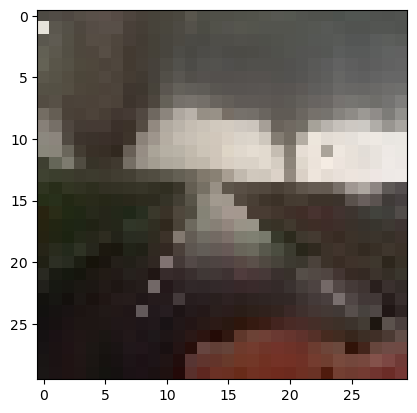

In [37]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

# Hacemos el One-hot Encoding para la red

In [38]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 4
After conversion to one-hot: [0. 0. 0. 0. 1.]


# Creamos el set de entrenamiento y validación

In [39]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(82044, 30, 30, 3) (20512, 30, 30, 3) (82044, 5) (20512, 5)


# Creamos el modelo de CNN

In [40]:
import numpy as np
import cv2 as cv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU

# Configuración inicial
INIT_LR = 1e-3  # Valor inicial del learning rate
epochs = 60  # Número de épocas
batch_size = 32  # Tamaño del lote
nClasses = 5  # Asumiendo que tienes 5 clases diferentes de tragedias

# Crear el modelo
sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', padding='same', input_shape=(30, 30, 3)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2), padding='same'))
sport_model.add(Dropout(0.5))

sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))

# Compilación del modelo
sport_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


C:\Users\Janin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Janin\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [41]:
sport_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │       230,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,493 (904.27 KB)

 Trainable params: 231,493 (904.27 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
sport_model.compile(
    loss=keras.losses.categorical_crossentropy, 
    optimizer=tf.keras.optimizers.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),
    metrics=['accuracy']
)


C:\Users\Janin\anaconda3\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


# Entrenamos el modelo: aprende a clasificar imágenes

In [43]:
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Epoch 1/60
2564/2564 ━━━━━━━━━━━━━━━━━━━━ 45s 17ms/step - accuracy: 0.4085 - loss: 1.4167 - val_accuracy: 0.7565 - val_loss: 0.8057
Epoch 2/60
2564/2564 ━━━━━━━━━━━━━━━━━━━━ 44s 17ms/step - accuracy: 0.6788 - loss: 0.8810 - val_accuracy: 0.8410 - val_loss: 0.5217
Epoch 3/60
2564/2564 ━━━━━━━━━━━━━━━━━━━━ 43s 17ms/step - accuracy: 0.7710 - loss: 0.6554 - val_accuracy: 0.8853 - val_loss: 0.4086
Epoch 4/60
2564/2564 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - accuracy: 0.8150 - loss: 0.5429 - val_accuracy: 0.9061 - val_loss: 0.3342
Epoch 5/60
2564/2564 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - accuracy: 0.8465 - loss: 0.4638 - val_accuracy: 0.9261 - val_loss: 0.2683
Epoch 6/60
2564/2564 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.8673 - loss: 0.4063 - val_accuracy: 0.9359 - val_loss: 0.2309
Epoch 7/60
2564/2564 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - accuracy: 0.8865 - loss: 0.3564 - val_accuracy: 0.9479 - val_loss: 0.1995
Epoch 8/60
2564/2564 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - accuracy: 0.8985 -

# Guardamos el modelo

In [44]:
# Guardar el modelo
ruta = "C:\\Users\\Janin\\Documents\\IA\\datasetsTrag\\CNN\\tragedias.h5"
if not os.path.exists(os.path.dirname(ruta)):
    print('Carpeta creada: ', os.path.dirname(ruta))
    os.makedirs(os.path.dirname(ruta))
sport_model.save(ruta)


In [45]:
# Guardar el modelo en formato nativo de Keras
ruta = "C:\\Users\\Janin\\Documents\\IA\\datasetsTrag\\CNN\\tragedias.keras"
if not os.path.exists(os.path.dirname(ruta)):
    print('Carpeta creada: ', os.path.dirname(ruta))
    os.makedirs(os.path.dirname(ruta))
sport_model.save(ruta)


# Evaluamos la red

In [46]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)

802/802 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9952 - loss: 0.0201


In [47]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.02310662530362606
Test accuracy: 0.9945007562637329


In [48]:
sport_train.history

{'accuracy': [0.506313681602478,
  0.7076812386512756,
  0.7812515497207642,
  0.8244112730026245,
  0.8534932732582092,
  0.8726049661636353,
  0.8885598182678223,
  0.9008337259292603,
  0.9112305641174316,
  0.9169957637786865,
  0.925320565700531,
  0.930915117263794,
  0.9352786540985107,
  0.9389352202415466,
  0.9432743191719055,
  0.9456267356872559,
  0.9483813643455505,
  0.9514650702476501,
  0.9534761905670166,
  0.9553044438362122,
  0.9565964341163635,
  0.9590342044830322,
  0.9607284069061279,
  0.9611306190490723,
  0.9622032046318054,
  0.9640558958053589,
  0.9653356671333313,
  0.9655550718307495,
  0.968248724937439,
  0.9677368402481079,
  0.9693822860717773,
  0.9699795246124268,
  0.9704548716545105,
  0.9718078374862671,
  0.9717468619346619,
  0.971771240234375,
  0.9726244211196899,
  0.9730632305145264,
  0.9739773869514465,
  0.9750012159347534,
  0.9758056402206421,
  0.9756350517272949,
  0.976341962814331,
  0.9769148230552673,
  0.9767685532569885,
  0.

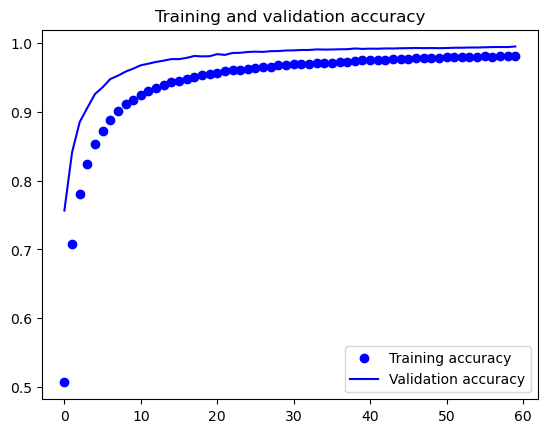

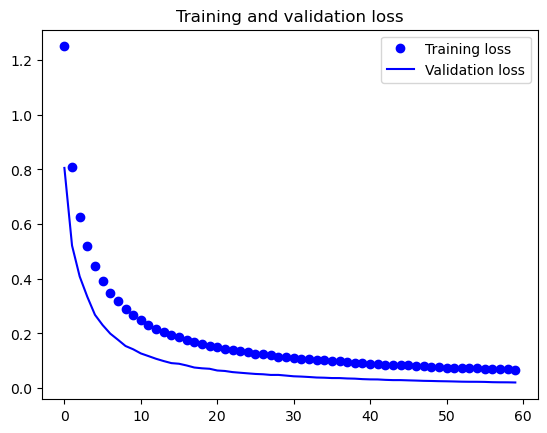

In [49]:
accuracy = sport_train.history['accuracy']
val_accuracy = sport_train.history['val_accuracy']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [50]:
predicted_classes2 = sport_model.predict(test_X)

802/802 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [51]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [52]:
predicted_classes.shape, test_Y.shape

((25640,), (25640,))

# Aprendamos de los errores: qué mejorar

In [ ]:
correct = np.where(predicted_classes == test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct], cmap='gray', interpolation='none')  # Asumiendo que test_X[correct] ya tiene el tamaño correcto
    plt.title("{}, {}".format(tragedias[predicted_classes[correct]], tragedias[test_Y[correct]]))
    plt.tight_layout()


Found 141 incorrect labels


C:\Users\Janin\AppData\Local\Temp\ipykernel_11884\3598589948.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Janin\AppData\Local\Temp\ipykernel_11884\3598589948.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


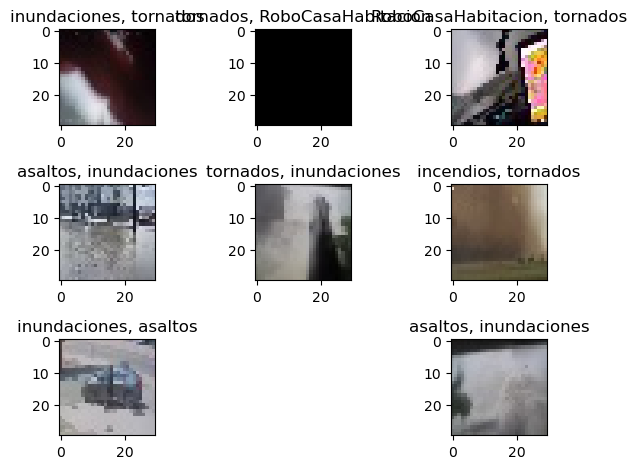

In [54]:
incorrect = np.where(predicted_classes != test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect], cmap='gray', interpolation='none')  # Asumiendo que test_X[incorrect] ya tiene el tamaño correcto
    plt.title("{}, {}".format(tragedias[predicted_classes[incorrect]], tragedias[test_Y[incorrect]]))
    plt.tight_layout()


In [61]:
from sklearn.metrics import classification_report

nClasses = len(np.unique(test_Y))  # Esto asume que test_Y tiene las etiquetas de clase
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))



              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      7890
     Class 1       1.00      1.00      1.00      2491
     Class 2       0.98      0.99      0.99      3911
     Class 3       1.00      0.99      1.00      4901
     Class 4       1.00      0.99      0.99      6447

    accuracy                           0.99     25640
   macro avg       0.99      0.99      0.99     25640
weighted avg       0.99      0.99      0.99     25640



In [62]:
print(f"INIT_LR = {INIT_LR}\nepochs = {epochs}\nbatch_size = {batch_size}\n")
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))

INIT_LR = 0.001
epochs = range(0, 60)
batch_size = 32

Test loss: 0.02310662530362606
Test accuracy: 0.9945007562637329
Found 25499 correct labels
Found 141 incorrect labels


In [71]:
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image
from tabulate import tabulate
import os
import matplotlib.pyplot as plt

# Carga del modelo
model = load_model("C:\\Users\\Janin\\Documents\\IA\\datasetsTrag\\CNN\\tragedias.keras")

# Procesamiento de la imagen
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((30, 30))  
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Ruta de las imagenes que deseas probar
dataTest = "C:\\Users\\Janin\\Documents\\IA\\datasetsTrag\\pruebaCNN"
imgs  = os.listdir(dataTest)

results = []

for img in imgs:
    imgpath = dataTest+'/'+img
    # Preprocesamiento de la imagen
    image = preprocess_image(imgpath)
    # Realizar predicciones
    predictions = model.predict(image)
    
    results.append([img, tragedias[np.argmax(predictions)]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


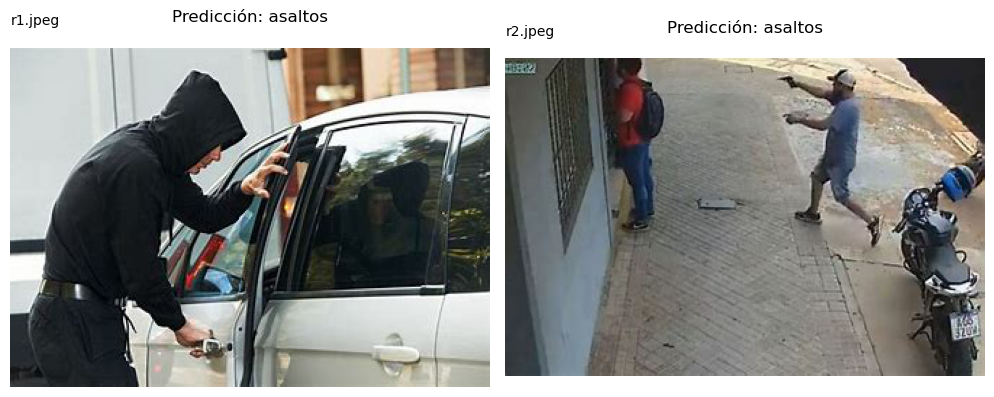

In [72]:
# Imprimir las predicciones 

plt.figure(figsize=(15, 15))

num_images = len(results)

for i, result in enumerate(results):
    img_path = os.path.join(dataTest, result[0])
    img = Image.open(img_path)
    plt.subplot((num_images // 3) + 1, 3, i + 1)
    plt.imshow(img)
    plt.title(f'Predicción: {result[1]}\n')
    plt.axis('off')
    plt.text(0, -5, result[0] + '\n', ha='left')

plt.tight_layout()
plt.show()